In [1]:
from matplotlib import pyplot, cm
from math import * 
import numpy
#import sympy
#from scipy.optimize import brentq
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 1D Stefan Problem

In [21]:
t = 0.1
alpha1 = 2.06*10**-5
Cp = 2030
Tw = 383.15
Tsat = 373.15
L = 2.26*10**6

In [22]:
(Cp*(Tw-Tsat))/(numpy.sqrt(numpy.pi)*L)

0.0050677205955838292

#Transcedental Equation
#from sympy import init_printing
#init_printing ()

In [23]:
#chi = sympy.symbols('chi')
#chi = (Cp*(Tw-Tsat))/(numpy.sqrt(numpy.pi)*L)*(sympy.erf(chi)*sympy.exp(chi**2))
#chi

In [25]:
chi = 0.0669161
#interface position theoritically
X = 2*chi*(numpy.sqrt(alpha1*t))

In [26]:
#Temperature distribution theoritically
#T = Tw +((Tsat-Tw)/math.erf(chi))*math.erf(chi/2*(numpy.sqrt(alphav*0.1)))
#T

(0.0, 0.1)

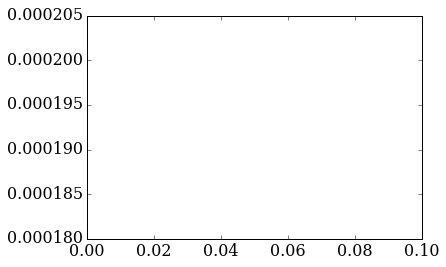

In [27]:
pyplot.plot(t,X)
pyplot.xlim(0.0,0.1)

In [32]:
#Numerical Solution
l = 0.001
nx = 100
dx = l/nx
nt = int(t/dt)
alpha2 = 0.17*10**-6
dt = (dx**2*0.05)/(numpy.max(alpha1,alpha2))

/home/gil/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return umr_maximum(a, axis, None, out, keepdims)


In [34]:
#Solving transcedental equation to find out the interface distance
for tstep in range(0,nt):
    XI = 2*chi*(numpy.sqrt(alpha1)*(tstep*dt))
XI

6.0742571454236452e-05

In [ ]:
x = numpy.linspace(0,10,nx)
numpy.shape(x)

In [ ]:
for i in range(nx):
    xt[1:-1] = X 

In [ ]:
#initial conditions

#X = numpy.ones(x)
#Xi = x*dt #interface moving w.r.t time

#Theoritical Interface motion 


XT = (Cp * (Tw - Tsat))/(numpy.sqrt(numpy.pi)*L)

XI = 2 * XT*(numpy.sqrt(alphav*t))
XI

# Theoritical Temperature Distribution
Td = Tw + ((Tsat-T)/XT)*(XT/XI)